             Method Training MSE Training R2  Test MSE    Test R2
0  LinearRegression      1.28015    0.114676  4.583657 -10.419184


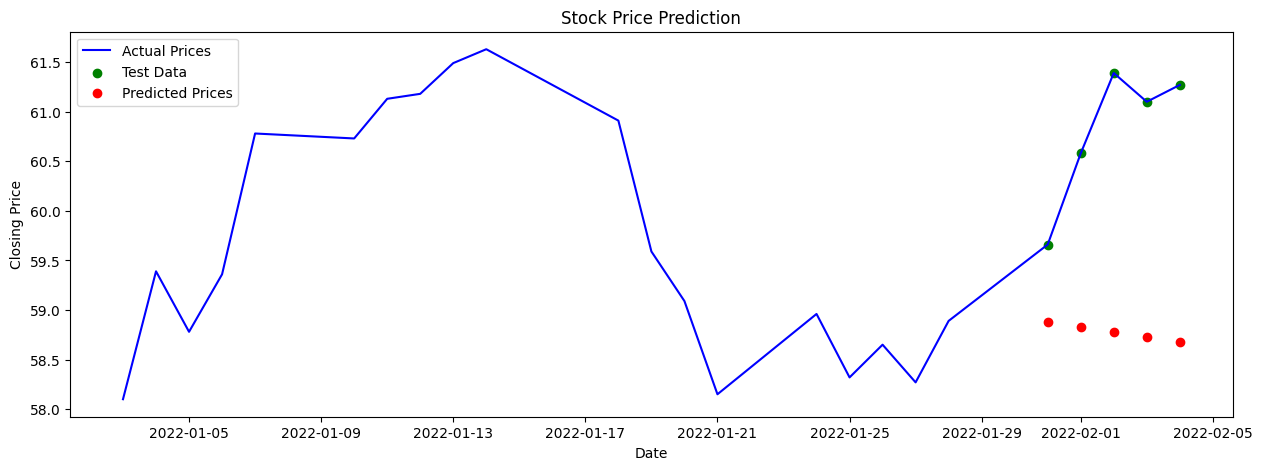

In [13]:
import pandas as pd
df = pd.read_csv("/Users/madhavvaranasi/Downloads/stock_price.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Date']].values
y = df['Close'].values
X = X.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
x_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, x_pred)
lr_train_r2 = r2_score(y_train, x_pred)
lr_test_mse = mean_squared_error(y_test, y_pred)
lr_test_r2 = r2_score(y_test, y_pred)
lr_results = pd.DataFrame(['LinearRegression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
print(lr_results)
import matplotlib.pyplot as plt
X_test_dates = pd.to_datetime(X_test.flatten())
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='blue')
plt.scatter(X_test_dates, y_test, label='Test Data', color='green')
plt.scatter(X_test_dates, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()